<a href="https://colab.research.google.com/github/LondheShubham153/exploratory_data_analysis/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


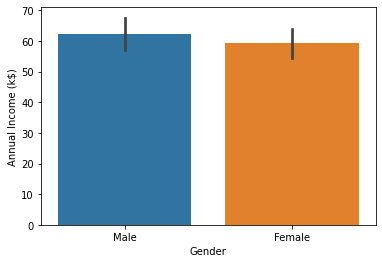

In [6]:
sns.barplot(x = df['Gender'], y = "Annual Income (k$)", data = df)


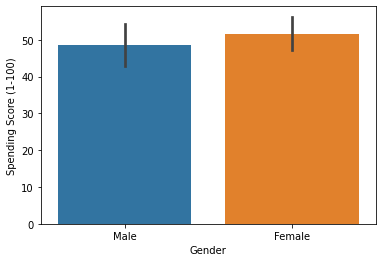

In [7]:
sns.barplot(x = df['Gender'], y = "Spending Score (1-100)", data = df)

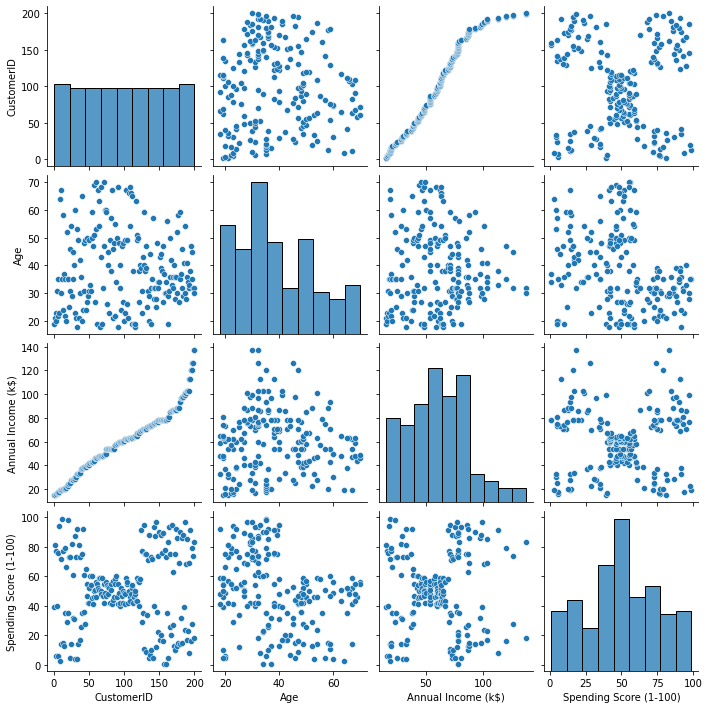

In [8]:
sns.pairplot(df)

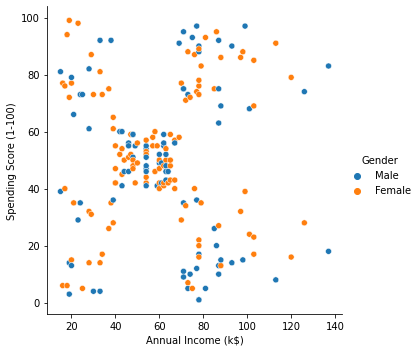

In [9]:
sns.relplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue="Gender", data=df)

In [18]:
clusters=[]
k_range = range(1,10)
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    clusters.append(km.inertia_)

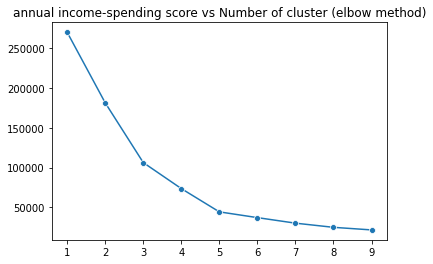

In [29]:
plt.title("annual income-spending score vs Number of cluster (elbow method)")
sns.lineplot(x=k_range, y=clusters, marker="o")

In [27]:
model=KMeans(n_clusters=5)
df_pred=model.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Cluster_id'] = df_pred

In [26]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_id
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0


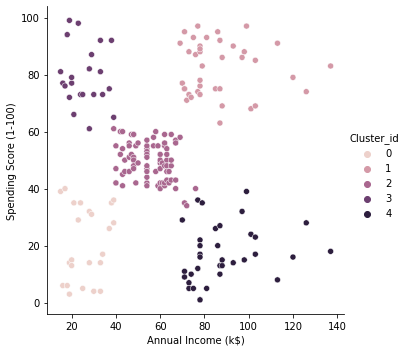

In [25]:
sns.relplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue="Cluster_id", data=df)